# Importing Necessary Libraires

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [141]:
df = pd.read_csv("movies.csv")
df.head(3)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...


In [142]:
df.shape

(722463, 20)

In [143]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        4
genres                  210489
original_language            0
overview                118344
popularity                   0
production_companies    385191
release_date             51854
budget                       0
revenue                      0
runtime                  34363
status                       0
tagline                 614123
vote_average                 0
vote_count                   0
credits                 224855
keywords                511999
poster_path             184734
backdrop_path           499538
recommendations         687459
dtype: int64


In [144]:
df = df.dropna(subset=['title', 'genres', 'overview', 'release_date', 'runtime'])

print("Number of rows after removing missing values:", df.shape)

Number of rows after removing missing values: (422317, 20)


In [145]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        0
genres                       0
original_language            0
overview                     0
popularity                   0
production_companies    152992
release_date                 0
budget                       0
revenue                      0
runtime                      0
status                       0
tagline                 329749
vote_average                 0
vote_count                   0
credits                  73225
keywords                241735
poster_path              66300
backdrop_path           240046
recommendations         388451
dtype: int64


In [146]:
# Find all unique values in the "original_language" column
unique_languages = df['original_language'].unique()

# Print the unique values
print("Unique languages:", unique_languages)

# Find the count of occurrences of each unique value
language_counts = df['original_language'].value_counts()

print(language_counts)

Unique languages: ['en' 'la' 'ko' 'es' 'no' 'cn' 'ja' 'hi' 'fi' 'ru' 'uk' 'nl' 'it' 'zh'
 'bn' 'th' 'id' 'is' 'da' 'fr' 'pl' 'te' 'pt' 'de' 'ro' 'tl' 'ta' 'ar'
 'sr' 'el' 'sv' 'gl' 'tr' 'vi' 'ml' 'bs' 'ga' 'fa' 'lv' 'nb' 'mk' 'pa'
 'cs' 'eu' 'kn' 'ca' 'sh' 'km' 'gu' 'he' 'hu' 'dz' 'xx' 'ne' 'ka' 'ms'
 'mn' 'kk' 'mr' 'af' 'et' 'bo' 'sk' 'wo' 'ur' 'hy' 'se' 'sq' 'kl' 'su'
 'ku' 'hr' 'sw' 'mi' 'sl' 'cy' 'as' 'lt' 'ps' 'qu' 'bm' 'rw' 'uz' 'bg'
 'am' 'lo' 'iu' 'si' 'zu' 'os' 'xh' 'ak' 'yi' 'mt' 'ay' 'ff' 'eo' 'st'
 'jv' 'ha' 'gn' 'lb' 'az' 'gd' 'or' 'mo' 'ln' 'my' 'ky' 'fo' 'yo' 'tg'
 'tw' 'be' 'sm' 'ie' 'co' 'rm' 'sa' 'ti' 'ab' 'fy' 'tk' 'so' 'lg' 'ht'
 'ba' 'mg' 'ss' 'dv' 'tt' 'ia' 'cr' 'ny' 'ig' 'ce' 'bi' 'nn' 'ii' 'sn'
 'nv' 'mh' 'sg' 'ki' 'to' 'ts' 'om' 'rn' 'sd' 'ks' 'gv' 'tn' 'cv' 'ug'
 'sc' 'ty' 'ch']
en    235619
fr     21241
es     20347
ja     17563
de     13404
       ...  
rn         1
ts         1
ki         1
nv         1
ch         1
Name: original_language, Length: 157, dty

In [147]:
unique_gen = df['genres'].unique()

# Print the unique values
print("Unique languages:", unique_gen)

gen_counts = df['genres'].value_counts()

gen_counts.to_csv("GenreCounts.csv")

Unique languages: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ... 'Music-Crime-Adventure-Romance'
 'Documentary-Science Fiction-Mystery-Fantasy'
 'Animation-Science Fiction-Comedy-Documentary']


In [148]:
df = df[df['original_language'] == 'en']

print("Number of rows after filtering for English movies:", df.shape)

Number of rows after filtering for English movies: (235619, 20)


In [149]:
df.head(3)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...


In [150]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                           0
title                        0
genres                       0
original_language            0
overview                     0
popularity                   0
production_companies     91944
release_date                 0
budget                       0
revenue                      0
runtime                      0
status                       0
tagline                 162824
vote_average                 0
vote_count                   0
credits                  43252
keywords                123979
poster_path              42819
backdrop_path           136917
recommendations         215630
dtype: int64


In [151]:
selected_columns = ['title', 'genres', 'overview', 'release_date', 'budget', 'revenue', 'runtime']

df = df[selected_columns]

print("Columns after removing unselected columns:")
print(df.columns)

Columns after removing unselected columns:
Index(['title', 'genres', 'overview', 'release_date', 'budget', 'revenue',
       'runtime'],
      dtype='object')


In [152]:
df.head(5)


,title,genres,overview,release_date,budget,revenue,runtime
0,Meg 2: The Trench,Action-Science Fiction-Horror,An exploratory dive into the deepest depths of...,2023-08-02,129000000.0,352056482.0,116.0
1,The Pope's Exorcist,Horror-Mystery-Thriller,Father Gabriele Amorth Chief Exorcist of the V...,2023-04-05,18000000.0,65675816.0,103.0
2,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,When a new threat capable of destroying the en...,2023-06-06,200000000.0,407045464.0,127.0
3,Dune: Part Two,Science Fiction-Adventure,Follow the mythic journey of Paul Atreides as ...,2024-02-27,190000000.0,683813734.0,167.0
4,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,Super-Hero partners Scott Lang and Hope van Dy...,2023-02-15,200000000.0,475766228.0,125.0


In [153]:
df.dropna(subset=['genres'], inplace=True)
df = df[df['genres'] != 'nan']
df.shape

(235619, 7)

In [154]:
df.to_csv("preprocessed.csv")

In [155]:
csv_filename = 'preprocessed.csv'

# Create a list to store the modified rows
modified_rows = []

with open(csv_filename, 'r', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        genres = row['genres'].split('-')
        
        if genres[0].strip() in ["TV Movie", "Documentary"]:
            modified_genre = genres[1].strip() if len(genres) > 1 else ''
        elif genres[0].strip() == "Science":
            modified_genre = "Science Fiction"
        else:
            modified_genre = genres[0].strip()
        
        # Update the genres column in the current row
        row['genres'] = modified_genre
        
        modified_rows.append(row)

# Write the modified rows back to the CSV file
with open(csv_filename, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = reader.fieldnames
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Write the modified rows
    writer.writerows(modified_rows)

print("Genres column updated successfully!")

Genres column updated successfully!


In [156]:
# Find all unique values in the "original_language" column
unique_gens = df['genres'].unique()

# Print the unique values
print("Unique gen:", unique_gens)

# Find the count of occurrences of each unique value
gen_counts = df['genres'].value_counts()

print(gen_counts)

Unique gen: ['Action-Science Fiction-Horror' 'Horror-Mystery-Thriller'
 'Action-Adventure-Science Fiction' ...
 'Documentary-Family-Science Fiction' 'Horror-Drama-Crime-Thriller'
 'Comedy-Drama-Family-Documentary']
Documentary                             47224
Drama                                   23797
Comedy                                  17989
Animation                               11580
Music                                    9826
                                        ...  
Action-Horror-TV Movie                      1
Mystery-Animation-Crime                     1
Science Fiction-Fantasy-Family-Drama        1
Drama-Action-Music-Romance                  1
Comedy-Drama-Family-Documentary             1
Name: genres, Length: 7711, dtype: int64


In [157]:
df = pd.read_csv("preprocessed.csv")

# Data Visualization

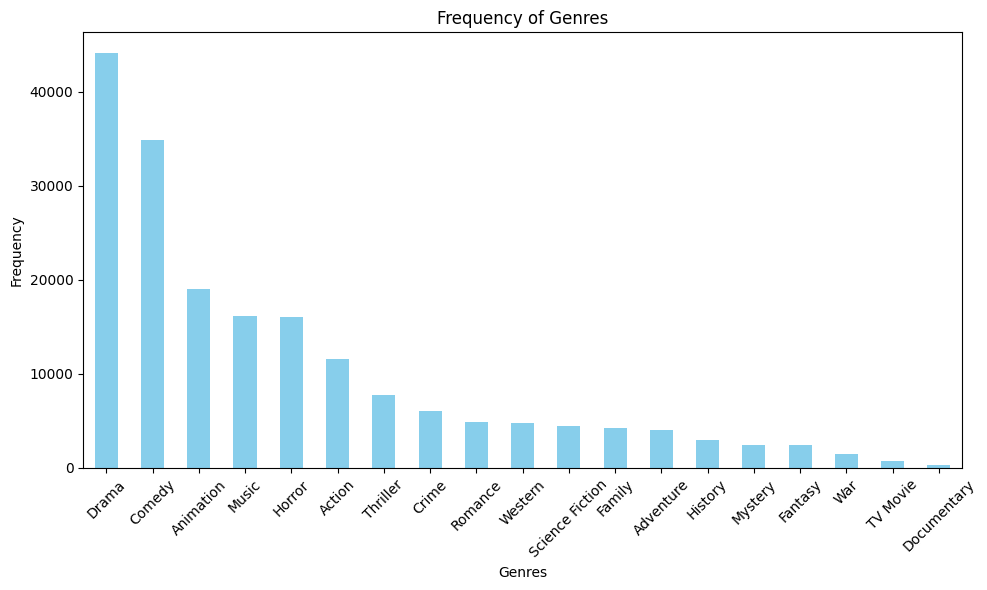

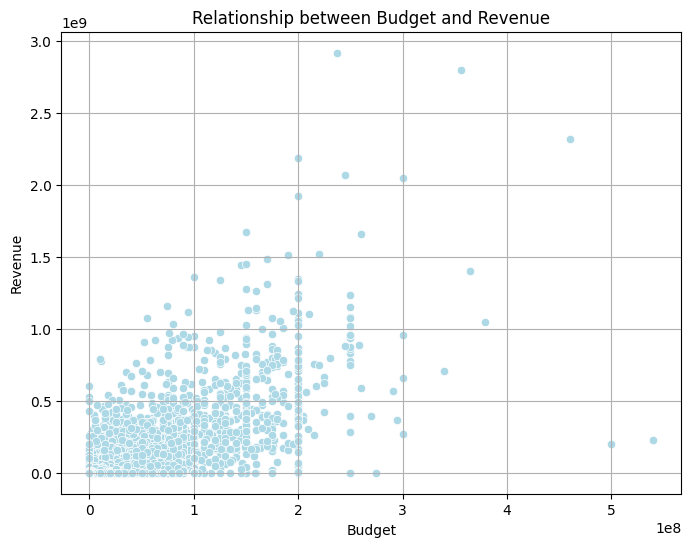

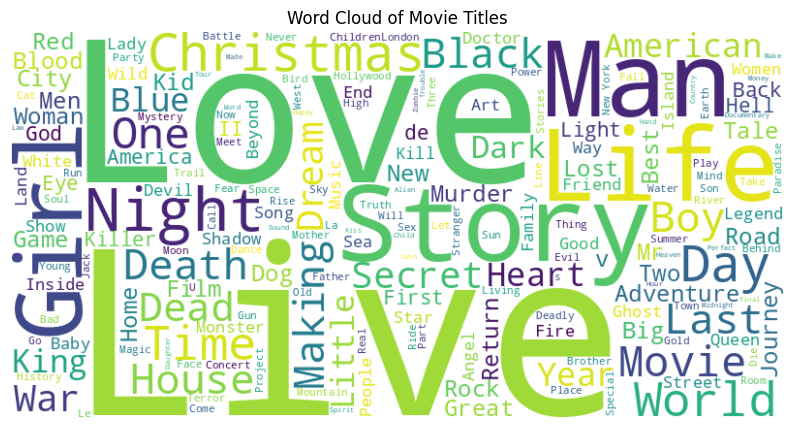

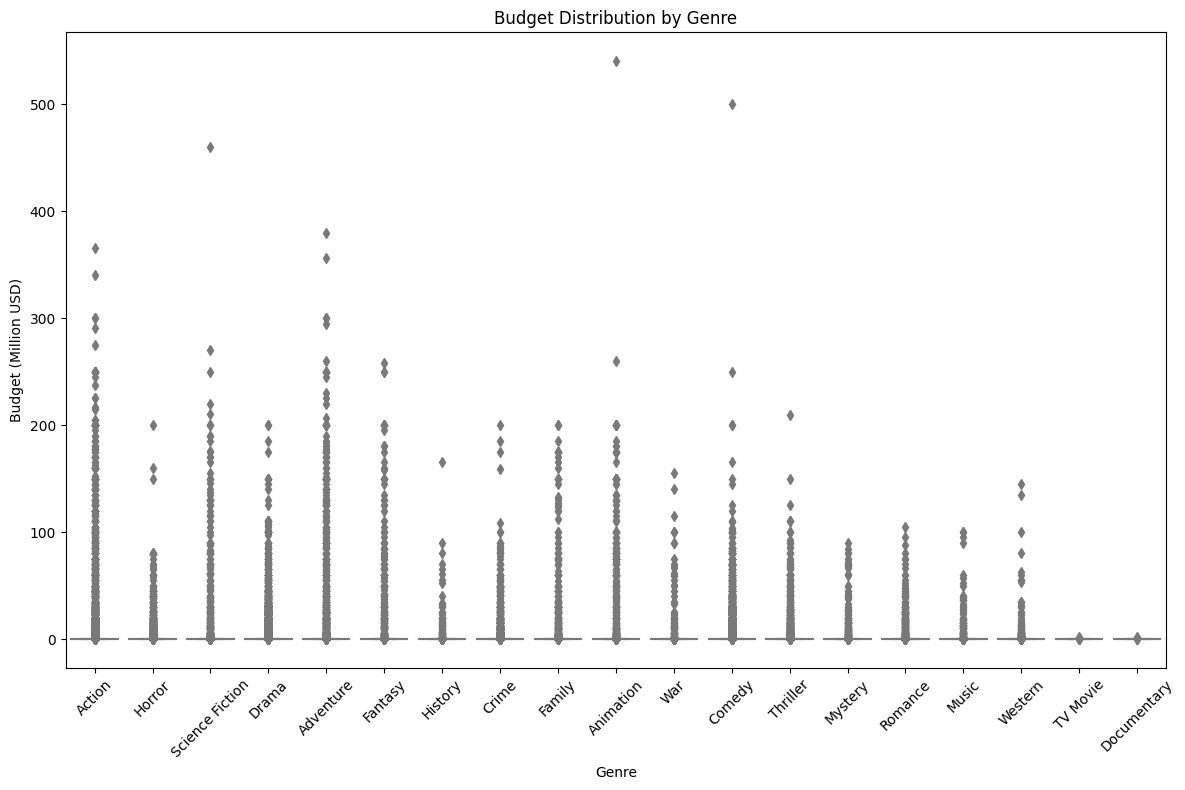

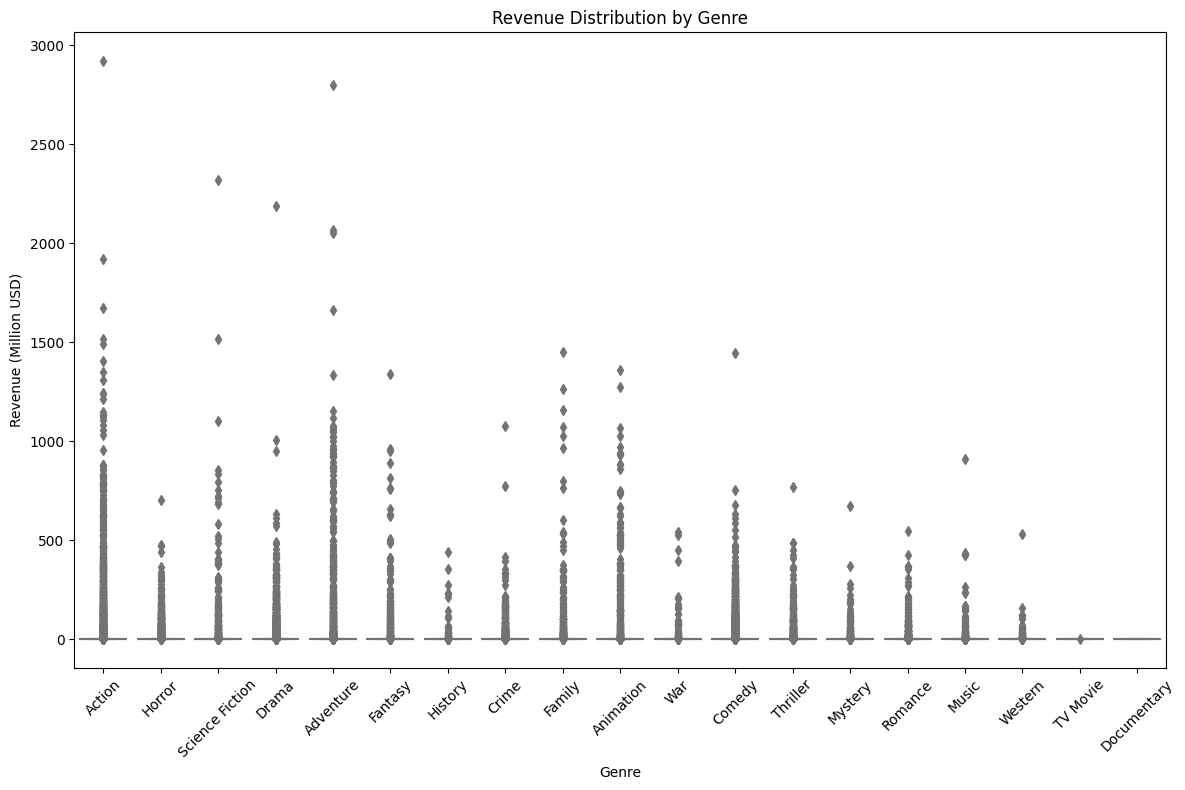

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv("preprocessed.csv")

genre_counts = df['genres'].str.split(',').explode().str.strip().value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Frequency of Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing the relationship between budget and revenue
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='revenue', data=df, color='lightblue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship between Budget and Revenue')
plt.grid(True)
plt.show()

# Creating a word cloud of movie titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['title']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()

# Budget and Revenue Comparison by Genre
df['budget'] = df['budget']/1000000  # Replace 0 budget with NA to exclude from visualization
df['revenue'] = df['revenue']/1000000  # Replace 0 revenue with NA to exclude from visualization

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='budget', data=df.dropna(subset=['budget']), color='lightblue')
plt.xlabel('Genre')
plt.ylabel('Budget (Million USD)')
plt.title('Budget Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='revenue', data=df.dropna(subset=['revenue']), color='lightgreen')
plt.xlabel('Genre')
plt.ylabel('Revenue (Million USD)')
plt.title('Revenue Distribution by Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Handling Class Imbalance

In [159]:
df = df[df['genres'] != 'nan']

In [160]:
df.shape

(235619, 8)

In [161]:
df = pd.read_csv('preprocessed.csv') 

genre_mapping = {
    "Romance": "Drama",
    "Adventure": "Action"
}

desired_genres = ["Drama", "Romance", "Comedy", "Action", "Adventure", "Horror", "Thriller"]

df = df[df['genres'].isin(desired_genres)]

df['genres'] = df['genres'].map(genre_mapping).fillna(df['genres'])

df = df[['title', 'overview', 'genres']]

print(df)

                                    title  \
0                       Meg 2: The Trench   
1                     The Pope's Exorcist   
2        Transformers: Rise of the Beasts   
4       Ant-Man and the Wasp: Quantumania   
5                               Creed III   
...                                   ...   
235611                           Upstream   
235614                      Tears at Dawn   
235615                             Memory   
235616                   Jerome's Bouquet   
235617              WSU The Final Chapter   

                                                 overview  genres  
0       An exploratory dive into the deepest depths of...  Action  
1       Father Gabriele Amorth Chief Exorcist of the V...  Horror  
2       When a new threat capable of destroying the en...  Action  
4       Super-Hero partners Scott Lang and Hope van Dy...  Action  
5       After dominating the boxing world Adonis Creed...   Drama  
...                                                

In [162]:
X = df[['title', 'overview']]
y = df['genres']

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

balanced_df = pd.DataFrame(X_resampled, columns=['title', 'overview'])
balanced_df['genres'] = y_resampled
balanced_df.shape

balanced_df.to_csv('Balanced_Preprocessed.csv', index=False)

# Model Training

In [163]:
df.head(1)

,title,overview,genres
0,Meg 2: The Trench,An exploratory dive into the deepest depths of...,Action


In [164]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_resampled['overview'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.2, random_state=42)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy*100)

              precision    recall  f1-score   support

      Action       0.76      0.73      0.74      9638
      Comedy       0.73      0.62      0.67      9824
       Drama       0.65      0.57      0.61      9719
      Horror       0.74      0.78      0.76      9930
    Thriller       0.64      0.79      0.71      9848

    accuracy                           0.70     48959
   macro avg       0.70      0.70      0.70     48959
weighted avg       0.70      0.70      0.70     48959

Overall Accuracy: 69.96466431095406


In [165]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, min_df=1, ngram_range=(1, 2))
nb_classifier = MultinomialNB(alpha=0.1)

X_vectorized = tfidf_vectorizer.fit_transform(X_resampled['overview'])

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_resampled, test_size=0.2, random_state=42)

nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy*100)

              precision    recall  f1-score   support

      Action       0.91      0.95      0.93      9638
      Comedy       0.87      0.79      0.83      9824
       Drama       0.83      0.73      0.78      9719
      Horror       0.91      0.97      0.94      9930
    Thriller       0.91      0.99      0.95      9848

    accuracy                           0.89     48959
   macro avg       0.89      0.89      0.89     48959
weighted avg       0.89      0.89      0.89     48959

Overall Accuracy: 88.86415163708409


In [166]:
title = "Dark Echoes"
overview = "When renowned journalist Sarah Harper receives a mysterious phone call from an unknown caller, she's plunged into a dangerous game of cat and mouse that threatens to unravel her life. As she delves deeper into the caller's cryptic messages, Sarah discovers a web of deceit and betrayal stretching back decades. With her every move watched and her every secret exposed, Sarah must race against time to uncover the truth before it's too late. But as she gets closer to the heart of the mystery, she realizes that some secrets are best left buried, and that the truth may be more sinister than she ever imagined."

input_vectorized = tfidf_vectorizer.transform([title + " " + overview])

predicted_genre = nb_classifier.predict(input_vectorized)

print("Predicted Genre:", predicted_genre[0])

Predicted Genre: Thriller
